## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
main_df = study_results.merge(mouse_metadata,on="Mouse ID")

# Display the data table for preview
main_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice
main_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
main_df.loc[main_df.duplicated(["Mouse ID", "Timepoint"])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
main_df.loc[main_df['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = main_df.loc[main_df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({"mean":grp.mean(),"median":grp.median(), "variance":grp.var(),"STD": grp.std(), "SEM": grp.sem()})


,mean,median,variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grp.agg(['mean','median','var','sem'])

,mean,median,var,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar and Pie Charts

In [10]:
# Get count of mice (Mouse ID) for each Regimen using groupby method
treat_data = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen = pd.DataFrame(treat_data)
regimen.head()

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


Text(0, 0.5, 'Mice')

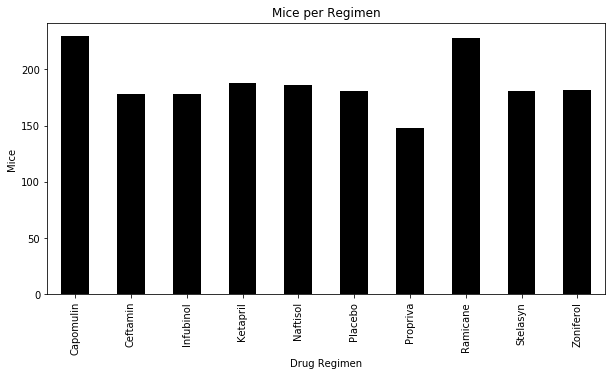

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treat_data.plot(kind = "bar", figsize=(10,5),facecolor = "black")
plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

In [12]:
# Group Mouse ID by Sex
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df.rename(columns = {"Sex":"Sex", "Mouse ID": "Distribution"})
gender_df = gender_df[["Sex", "Distribution"]]
gender_df

,Sex,Distribution
0,Female,922
1,Male,958


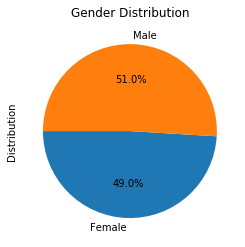

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
gender_df.plot(kind="pie",autopct='%1.1f%%', title = "Gender Distribution", 
               y = "Distribution", labels = gender_df['Sex'], startangle=180, legend = False)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_df['Sex'].value_counts()
counts

Male      958
Female    922
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

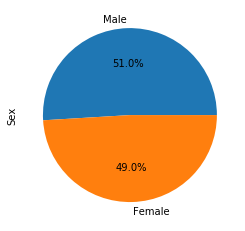

In [15]:
plt.pie(counts.values, labels = counts.index.values, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby('Mouse ID')["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_tumor[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [17]:
# List of the 4 treatment regimens 
cric_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
fin_tumor = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in cric_reg:
    fin_tumor[drug] = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol.append(fin_tumor[drug])
    quartiles = fin_tumor[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq,2)  
    
     # Determine outliers using upper and lower bounds
    lowerb = round(lowerq - (1.5*iqr),2)
    upperb = round(upperq + (1.5*iqr),2)
    outliers = fin_tumor[drug].loc[(fin_tumor[drug] < lowerb) | (fin_tumor[drug]  > upperb)]
    
    print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The interquartile range of {drug} is: {iqr}")
#     print(f"{drug} potential outliers: {outliers}")
    print(f"Values below {lowerb} for {drug} could be outliers.")
    print(f"Values above {upperb} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")

--------------------------------------------------------
Capomulin IQR data is:
The upper quartile of Capomulin is: 40.16
The lower quartile of Capomulin is: 32.38
The interquartile range of Capomulin is: 7.78
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Ramicane IQR data is:
The upper quartile of Ramicane is: 40.66
The lower quartile of Ramicane is: 31.56
The interquartile range of Ramicane is: 9.1
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Infubinol IQR data is:
The upper quartile of Infubinol is: 65.53
The lower quartile of Infubinol is: 54.05
The interquartile range of Infubinol is: 11.48
Values below 36.83 for Infubinol could be outliers.
Va

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = []

for drug in cric_reg:
    boxplot.append(list(fin_tumor[drug]))

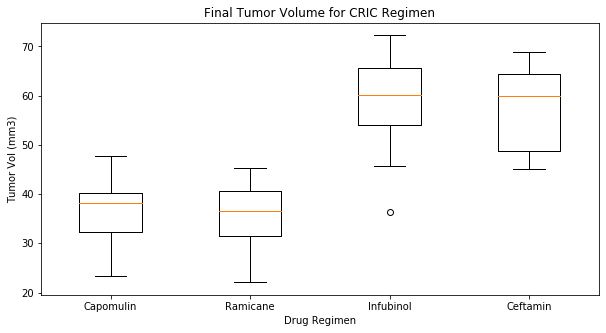

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('Final Tumor Volume for CRIC Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Vol (mm3)')
ax1.boxplot(boxplot)
plt.xticks([1,2,3,4],cric_reg)
plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_reg = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin']
mouse_data = cap_reg.loc[clean_df['Mouse ID']== 'l509']
mouse_data.head()                  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21


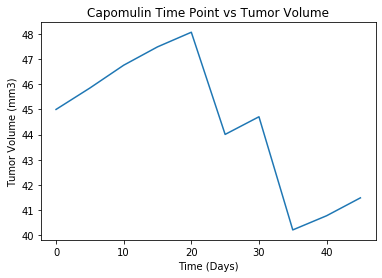

In [21]:
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])

# Labels
plt.title("Capomulin Time Point vs Tumor Volume")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

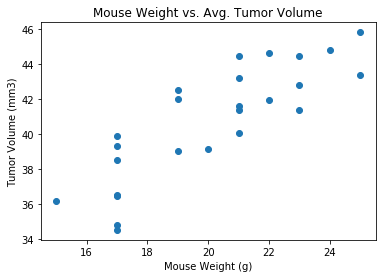

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_wgt_avol = cap_reg.groupby('Mouse ID').mean()
plt.scatter(cap_wgt_avol['Weight (g)'],cap_wgt_avol['Tumor Volume (mm3)'])

# Labels

plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


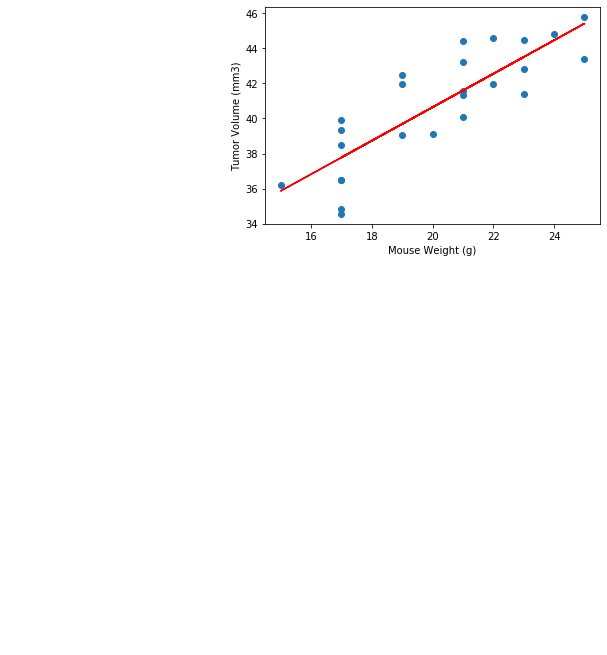

In [35]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_wgt_avol['Weight (g)']
y_values = cap_wgt_avol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()
